In [2]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(caret)

data = read.csv("D:/nyctrees/data/data.csv")

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: lattice


In [3]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
head(data)

ntaname_full,nta,nta_name,boro_ct,borocode,boroname,cncldist,inf_guard,inf_shoes,latitude,longitude,sidw_crack,st_assem,st_senate,healthstatus,tree_dbh,x_sp,y_sp,zip_city,zipcode,year,income,education,population,unemployment,popDensity,laborforce,poverty,diversity,genus,species,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,21,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,13,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,16,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,15,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,14,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Airport,QN98,Queens Village,4071600,4,Queens,28,No,No,40.66405,-73.80641,No,31,10,Good,16,1037959,181267,Jamaica,11430,2005,83630,0.3307154,188995,0.07134825,10.84658,0.6580465,0.05089094,3.0837,platanus,acerifolia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
#hist(data$tree_dbh)
data = data[data$tree_dbh < (3*sd(data$tree_dbh)),]
summary(data$tree_dbh)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   4.000   8.000   9.182  13.000  21.000 

### Regression Tree for tree_dbh
This initial tree will be looking at the raw tree_dbh

In [6]:
raw_cart = rpart(tree_dbh ~ sidw_crack + healthstatus + inf_guard + MeanCommute + boro_ct + Employed, data = data)

summary(raw_cart)

Call:
rpart(formula = tree_dbh ~ sidw_crack + healthstatus + inf_guard + 
    MeanCommute + boro_ct + Employed, data = data)
  n= 889981 

          CP nsplit rel error    xerror        xstd
1 0.04935033      0 1.0000000 1.0000029 0.001136912
2 0.02697468      1 0.9506497 0.9506534 0.001102201
3 0.01000000      2 0.9236750 0.9236809 0.001111162

Variable importance
healthstatus   sidw_crack 
          65           35 

Node number 1: 889981 observations,    complexity param=0.04935033
  mean=9.18164, MSE=30.05793 
  left son=2 (32517 obs) right son=3 (857464 obs)
  Primary splits:
      healthstatus splits as  RLRRL,        improve=0.049350330, (0 missing)
      sidw_crack   splits as  LR,           improve=0.027168950, (26358 missing)
      boro_ct      < 2024350  to the left,  improve=0.011183690, (60705 missing)
      MeanCommute  < 34.30339 to the left,  improve=0.004538525, (33013 missing)
      inf_guard    splits as  RL,           improve=0.003515917, (26358 missing)

Node numbe

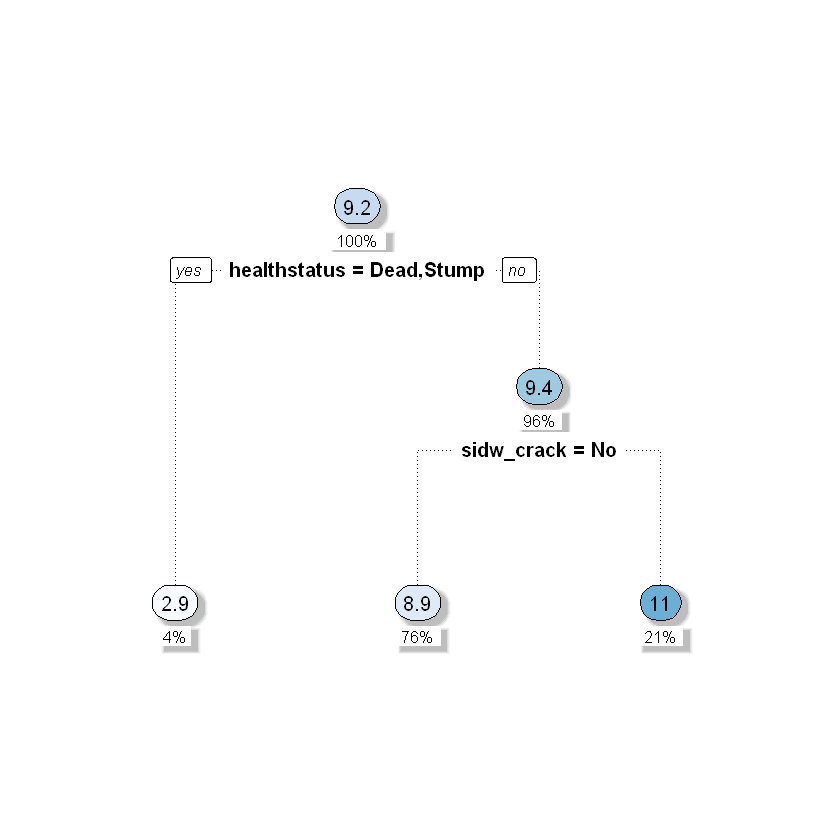

In [7]:
rpart.plot(raw_cart, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

### Classification Tree for tree_dbh
Creating classification for tree_dbh to split into 'big' and 'small' groups 

In [22]:
set.seed(42)
data$dbh_avg = as.factor(ifelse(data$tree_dbh >=8 , "big", "small"))
summary(data$dbh_avg)

part = createDataPartition(data$dbh_avg, p = 0.80, list = FALSE)
train = data[part,]
test = data[-part,]


big  small 
491714 398267

In [26]:
colnames(data)

[1] "ntaname_full"    "nta"             "nta_name"        "boro_ct"        
 [5] "borocode"        "boroname"        "cncldist"        "inf_guard"      
 [9] "inf_shoes"       "latitude"        "longitude"       "sidw_crack"     
[13] "st_assem"        "st_senate"       "healthstatus"    "tree_dbh"       
[17] "x_sp"            "y_sp"            "zip_city"        "zipcode"        
[21] "year"            "income"          "education"       "population"     
[25] "unemployment"    "popDensity"      "laborforce"      "poverty"        
[29] "diversity"       "genus"           "species"         "TotalPop"       
[33] "Men"             "Women"           "Hispanic"        "White"          
[37] "Black"           "Native"          "Asian"           "Citizen"        
[41] "Income"          "IncomeErr"       "IncomePerCap"    "IncomePerCapErr"
[45] "Poverty"         "ChildPoverty"    "Professional"    "Service"        
[49] "Office"          "Construction"    "Production"      "Drive"          
[53] "Carpool"         "Transit"         "Walk"            "OtherTransp"    
[57] "WorkAtHome"      "MeanCommute"     "Employed"        "PrivateWork"    
[61] "PublicWork"      "SelfEmployed"    "FamilyWork"      "Unemployment"   
[65] "dbh_avg"

In [32]:
class_cart <- rpart(dbh_avg ~ sidw_crack + healthstatus + inf_guard + MeanCommute + boro_ct + Employed, data = train)

summary(class_cart)

Call:
rpart(formula = dbh_avg ~ sidw_crack + healthstatus + inf_guard + 
    MeanCommute + boro_ct + Employed, data = train)
  n= 711986 

          CP nsplit rel error    xerror        xstd
1 0.06013232      0 1.0000000 1.0000000 0.001316842
2 0.01576830      1 0.9398677 0.9398677 0.001307355
3 0.01000000      3 0.9083311 0.9083311 0.001300792

Variable importance
healthstatus   sidw_crack      boro_ct  MeanCommute     Employed 
          48           40            9            2            2 

Node number 1: 711986 observations,    complexity param=0.06013232
  predicted class=big    expected loss=0.4475004  P(node) =1
    class counts: 393372 318614
   probabilities: 0.552 0.448 
  left son=2 (685893 obs) right son=3 (26093 obs)
  Primary splits:
      healthstatus splits as  LRLLR,        improve=9538.9280, (0 missing)
      sidw_crack   splits as  RL,           improve=8040.4930, (21140 missing)
      boro_ct      < 2024350  to the right, improve=2642.6660, (48513 missing)
      M

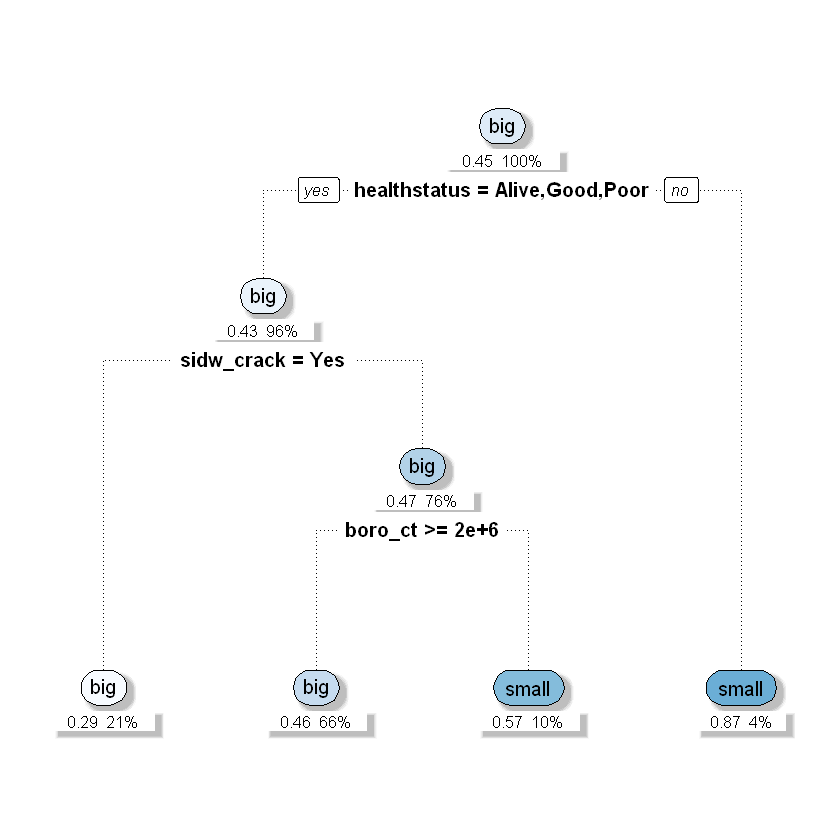

In [33]:
rpart.plot(class_cart, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [17]:
#Train prediction accuracy
train_predict = predict(class_cart, train, type = "class")
mean(train_predict == train$dbh_avg) 

#Test prediction accuracy
test_predict = predict(class_cart, test, type = "class")
mean(test_predict == test$dbh_avg)

[1] 0.5935215

[1] 0.593174

In [19]:
#Confusion Matrix, etc.
confusion_matrix <- table(predicted = train_predict, actual = train$dbh_avg)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.65
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.19
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.30
F1score

         actual
predicted    big  small
    big   360971 257006
    small  32401  61608

[1] 0.6553415

[1] 0.1933625

[1] 0.2986164